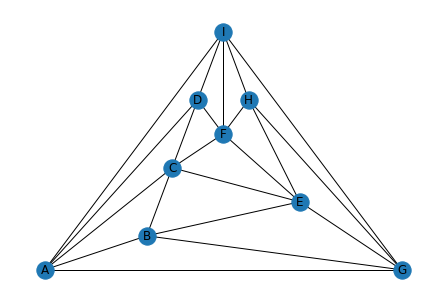

In [155]:
#Luca Comparini S4184885
import networkx as nx
import matplotlib.pyplot as plt
import random

#creo un multigrafo di Fritsch e inserisco prima i nodi e poi tutti gli archi
MG = nx.MultiGraph()
MG.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
MG.add_edges_from([('A','G'), ('A','B'), ('A','C'), ('A','D'), ('A','I')])
MG.add_edges_from([('B','G'), ('B','E'), ('B','C')])
MG.add_edges_from([('C','D'), ('C','F'), ('C','E')])
MG.add_edges_from([('D','F'), ('D','I')])
MG.add_edges_from([('E','G'), ('E','H'), ('E','F')])
MG.add_edges_from([('F','H'), ('F','I')])
MG.add_edges_from([('G','H'), ('G','I')])
MG.add_edges_from([('H','I')])

#plot del grafico senza intersezioni degli archi (un plot con intersezioni rende impossibile identificare il grafo)
#per aggiungere le etichette dei nodi inserire come argomento with_labels=True in nx.draw_planar()
nx.draw_planar(MG,with_labels=True)

In [165]:
#di seguito vediamo un comando compatto che permette di scegliere in modo randomico un arco dal grafo
#questo passaggio è il cuore dell'algoritmo, è ciò che rende randomico l'approccio di esecuzione del programma
edges=list(MG.edges())
chosen_edge = random.choice(edges)
print(chosen_edge)

('D', 'F')


4

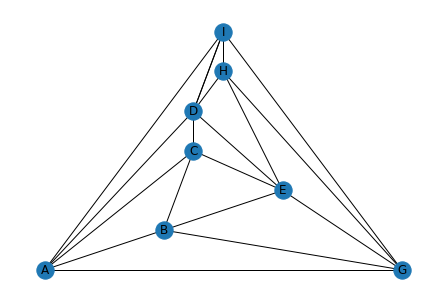

In [169]:
#introduco anche la funzione contracted_nodes che permette di eliminare un arco unendo i corrispondenti nodi
#e facendo incidere tutti i relativi archi nel nodo risultante
#il disegno che viene stampato mostra l'effetto della funzione contracted_edge sul grafo originale
G=nx.contracted_edge(MG, chosen_edge, self_loops=False, copy=True)
nx.draw_planar(G,with_labels=True)

#ora tutti gli elementi neccessari sono introdotti definisco la funzione mincut: comincio con i tagli 
#progressivi e casuali ed una volta arrivato a due nodi conto gli archi che sono rimasti e li restituisco
def mincut(G):
    while (G.number_of_nodes() > 2):
        edges=list(G.edges())
        chosen_edge = random.choice(edges)
        G=nx.contracted_edge(G, chosen_edge, self_loops=False, copy=True)
    return G.number_of_edges()
mincut(G)

In [173]:
#l'ultima parte che segue, andrà ad implementare le ripetizioni del min cut raccogliendo i risultati
#inanzitutto mi basta creare il multigrafo di Fritsch solo una volta, siccome contracted_edges
#restituisce una copia del grafo originale con l'opzione copy=True

#uso un dizionario (mincut, freq) per tenere conto del numero di tagli minimi
tagli_minimi = {}

for i in range(1, 100000):
    edges=list(MG.edges())
    chosen_edge = random.choice(edges)
    G=nx.contracted_edge(MG, chosen_edge, self_loops=False, copy=True)
    taglio_minimo=mincut(G)
    if taglio_minimo not in tagli_minimi:
        #se non è nel dizionario aggiungilo
        tagli_minimi[taglio_minimo] = 1
    else:
        #altrimenti aumento la frequenza corrispondente
        tagli_minimi[taglio_minimo] = tagli_minimi[taglio_minimo] + 1
    if i % 10000 == 0:
            print("Elaborazione della " + str(i) + "esima corsa")
        
minMinCut = min(tagli_minimi.items(), key=lambda x: x[0])
print("L'algoritmo termina con successo\n\nMinimo mincut: " + str(minMinCut[0]))
print("Quante volte esce: " + str(minMinCut[1]))

#calcola la frequenza empirica facendo la divisione tra
#la freq. di uscita del mincut minimo e il numero di iterazioni
f = minMinCut[1] / 100000
#confronta il risultato ottenuto con la stima p ≈ 2/n^2.
p = 2/(MG.number_of_nodes()**2)
print("La frequenza empirica del mincut è: " + str(f))
print("La stima p ≈ 2/n^2 è: " + str(p))
    

Elaborazione della 10000esima corsa
Elaborazione della 20000esima corsa
Elaborazione della 30000esima corsa
Elaborazione della 40000esima corsa
Elaborazione della 50000esima corsa
Elaborazione della 60000esima corsa
Elaborazione della 70000esima corsa
Elaborazione della 80000esima corsa
Elaborazione della 90000esima corsa
L'algoritmo termina con successo

Minimo mincut: 4
Quante volte esce: 32575
La frequenza empirica del mincut è: 0.32575
La stima p ≈ 2/n^2 è: 0.024691358024691357
